In [1]:
import sys 
import os

import numpy as np
import awkward as ak

sys.path.insert(0, '../../MATHUSLA_FastSim/')
import DetectorSimulation.Detector as Detector

sys.path.insert(0,'../../FastSim_Additions/')
import Additions as ad
import Event_Data_Structure as eds

In [2]:
fv_file = '../../SimulationData/ForMixingPlot/RHN_Ue_LLPweight4vectorBmesonlist_mN_0.316228.csv'
fv_path = os.path.join(os.getcwd(), fv_file)
length_file = '../../SimulationData/RHNctauUe.dat'
len_path = os.path.join(os.getcwd(), length_file)
product_file = '../../SimulationData/vN_to_all_0.314228_hadron_style.txt'
prod_path = os.path.join(os.getcwd(), product_file)

In [3]:
mass = float(fv_file.split('_')[-1][:-4])
mixing = 0.004
ctau = ad.get_ctaus(mass = mass, mixing = mixing,length_file = len_path)
detector_benchmark = ad.initiate_detector('../../MATHUSLA_FastSim/param_card_CDR.txt')

In [4]:
vertices = ad.time_process(ad.do_sim, [fv_path, prod_path, ctau, mass, detector_benchmark, 10000])

do_sim: Runtime 4.007711600046605 s


In [5]:
data = eds.to_data_structure(vertices)

In [12]:
data['daughters'][1][0][6]

1.0

In [18]:
bool1 = data['daughters'][:,:,5] >= 4

In [19]:
bool2 = data['daughters'][:,:,6] == 1

In [22]:
reconstructable = bool1 & bool2

In [143]:
vertex_constructed_3p = ak.sum(data['daughters'][reconstructable][:,:,1:4], axis = 1)
at_least_one_momentum = ak.sum(reconstructable, axis = 1) >= 1

In [49]:
important_pos = data['position'][at_least_one_momentum]

In [51]:
important_pos.shape

(727, 3)

In [62]:
three_p = ak.mask(data['daughters'][:,:,1:4],reconstructable)

In [70]:
three_p_stage2 = ak.sum(ak.fill_none(three_p, ak.Array([0,0,0]), axis = 1), axis = 1)

In [150]:
test = three_p_stage2.to_numpy()

In [155]:
test[np.linalg.norm(test, axis = 1) > 0].shape

(727, 3)

In [78]:
momentum_recon_bool = np.abs(ak.sum(three_p_stage2, axis = 1)) > 0

In [84]:
recon_3p = three_p_stage2[momentum_recon_bool].to_numpy()

In [89]:
recon_3p

array([[0.50171234, 0.99383346, 0.79158675],
       [0.12539677, 0.0830502 , 0.16347547],
       [0.23901246, 2.08879906, 1.83025651],
       ...,
       [0.43386628, 0.35750363, 0.22678386],
       [0.06871242, 0.30879934, 0.39639791],
       [0.40671136, 2.19107015, 1.75223919]])

In [108]:
recon_3p.shape

(727, 3)

In [109]:
important_pos.T.shape

(3, 727)

In [90]:
important_pos

array([[ 35.69210578, 121.17331433,  79.40735659],
       [-38.22493635,  88.76515934,  64.152305  ],
       [  2.1856338 ,  86.14681616,  77.32242605],
       ...,
       [ 43.41341768, 131.93370486,  83.69267285],
       [-14.59294752,  84.75439935,  70.01761091],
       [  7.75856359,  74.41489626,  61.32220629]])

In [129]:
def separate_dot(x,y):
    return np.sum(x * y, axis = 1)

def proj(x,y):
    return separate_dot(x,y) * y.T / np.linalg.norm(y, axis = 1)**2

def nearest_approach(position, momentum):
    projection = position - proj(position, momentum).T
    return np.linalg.norm(projection, axis = 1)

In [130]:
separate_dot(important_pos, recon_3p).shape

(727,)

In [131]:
(separate_dot(important_pos, recon_3p) * recon_3p.T / np.linalg.norm(recon_3p, axis = 1)**2).T

array([[ 54.09347962, 107.15285616,  85.34707723],
       [ 33.20305952,  21.99036659,  43.28569005],
       [  9.90451921,  86.55846014,  75.84462701],
       ...,
       [100.33495406,  82.67549714,  52.44553196],
       [ 14.13846697,  63.53944687,  81.56398402],
       [ 13.84905718,  74.60882299,  59.66605112]])

In [135]:
approach = nearest_approach(important_pos, recon_3p)

In [136]:
import matplotlib.pyplot as plt

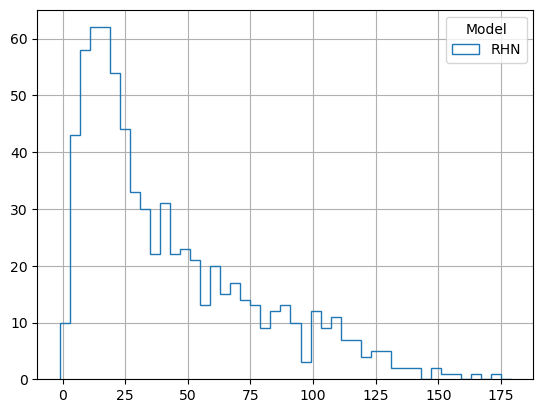

In [158]:
plt.hist(approach, bins = np.arange(-1,180, 4), histtype = 'step', label = 'RHN')
plt.grid()
plt.legend(title = 'Model')